<p style="background-color: #6700c0; font-family: Franklin Gothic Medium; color: #FFF9ED; font-size: 250%; text-align: center; border-radius: 10px;">
  <a id="load_lib" style="color: white; text-decoration: none;">Importing all the Libraries</a>
</p>


In [1]:
import json
import re
import nltk
import string
import spacy
import en_core_web_sm
nlp = en_core_web_sm.load()

#Importing libraries required for the case study and to plot charts
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import os
from plotly.offline import plot
import plotly.graph_objects as go
import plotly.express as px
%matplotlib inline

# hide warnings
import warnings
warnings.filterwarnings('ignore')

# set options
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)

from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
from pprint import pprint

## The data is in JSON format and we need to convert it to a dataframe.

In [2]:
root_path = r"/kaggle/input/content1/complaints-2021-05-14_08_16.json"

In [3]:
# Opening JSON file
f = open(root_path)

# returns JSON object as a dictionary
data = json.load(f)

<p style="background-color: #6700c0; font-family: Franklin Gothic Medium; color: #FFF9ED; font-size: 250%; text-align: center; border-radius: 10px;">
  <a id="data_prep" style="color: white; text-decoration: none;">Data preparation</a>
</p>


# **Data preparation**


Data cleaning operations like filtering text, removing missing values & renaming column headers.

In [4]:
# data is in the nested format so will convert in the table format by normalizing it
df=pd.json_normalize(data)

In [5]:
# Inspect the dataframe to understand the given data.
df.head(10)

,_index,_type,_id,_score,_source.tags,_source.zip_code,_source.complaint_id,_source.issue,_source.date_received,_source.state,_source.consumer_disputed,_source.product,_source.company_response,_source.company,_source.submitted_via,_source.date_sent_to_company,_source.company_public_response,_source.sub_product,_source.timely,_source.complaint_what_happened,_source.sub_issue,_source.consumer_consent_provided
0,complaint-public-v2,complaint,3211475,0.0,None,90301,3211475,Attempts to collect debt not owed,2019-04-13T12:00:00-05:00,CA,N/A,Debt collection,Closed with explanation,JPMORGAN CHASE & CO.,Web,2019-04-13T12:00:00-05:00,None,Credit card debt,Yes,,Debt is not yours,Consent not provided
1,complaint-public-v2,complaint,3229299,0.0,Servicemember,319XX,3229299,Written notification about debt,2019-05-01T12:00:00-05:00,GA,N/A,Debt collection,Closed with explanation,JPMORGAN CHASE & CO.,Web,2019-05-01T12:00:00-05:00,None,Credit card debt,Yes,Good morning my name is XXXX XXXX and I apprec...,Didn't receive enough information to verify debt,Consent provided
2,complaint-public-v2,complaint,3199379,0.0,None,77069,3199379,"Other features, terms, or problems",2019-04-02T12:00:00-05:00,TX,N/A,Credit card or prepaid card,Closed with explanation,JPMORGAN CHASE & CO.,Web,2019-04-02T12:00:00-05:00,None,General-purpose credit card or charge card,Yes,I upgraded my XXXX XXXX card in XX/XX/2018 and...,Problem with rewards from credit card,Consent provided
3,complaint-public-v2,complaint,2673060,0.0,None,48066,2673060,Trouble during payment process,2017-09-13T12:00:00-05:00,MI,N/A,Mortgage,Closed with explanation,JPMORGAN CHASE & CO.,Web,2017-09-14T12:00:00-05:00,None,Conventional home mortgage,Yes,,None,Consent not provided
4,complaint-public-v2,complaint,3203545,0.0,None,10473,3203545,Fees or interest,2019-04-05T12:00:00-05:00,NY,N/A,Credit card or prepaid card,Closed with explanation,JPMORGAN CHASE & CO.,Referral,2019-04-05T12:00:00-05:00,None,General-purpose credit card or charge card,Yes,,Charged too much interest,N/A
5,complaint-public-v2,complaint,3275312,0.0,Older American,48227,3275312,Managing an account,2019-06-13T12:00:00-05:00,MI,N/A,Checking or savings account,Closed with monetary relief,JPMORGAN CHASE & CO.,Referral,2019-06-14T12:00:00-05:00,None,Checking account,Yes,,Problem using a debit or ATM card,N/A
6,complaint-public-v2,complaint,3238804,0.0,None,76262,3238804,Managing an account,2019-05-10T12:00:00-05:00,TX,N/A,Checking or savings account,Closed with monetary relief,JPMORGAN CHASE & CO.,Phone,2019-05-10T12:00:00-05:00,None,Checking account,Yes,,Problem using a debit or ATM card,N/A
7,complaint-public-v2,complaint,3249272,0.0,None,07753,3249272,Trouble during payment process,2019-05-15T12:00:00-05:00,NJ,N/A,Mortgage,Closed with explanation,JPMORGAN CHASE & CO.,Referral,2019-05-21T12:00:00-05:00,None,Conventional home mortgage,Yes,,None,N/A
8,complaint-public-v2,complaint,3351653,0.0,None,60621,3351653,Closing an account,2019-08-22T12:00:00-05:00,IL,N/A,Checking or savings account,Closed with explanation,JPMORGAN CHASE & CO.,Referral,2019-08-23T12:00:00-05:00,None,Checking account,Yes,,Company closed your account,N/A
9,complaint-public-v2,complaint,3273612,0.0,None,99354,3273612,Managing an account,2019-06-11T12:00:00-05:00,WA,N/A,Checking or savings account,Closed with monetary relief,JPMORGAN CHASE & CO.,Referral,2019-06-17T12:00:00-05:00,None,Checking account,Yes,,Cashing a check,N/A


In [6]:
#print the column names
df.columns

Index(['_index', '_type', '_id', '_score', '_source.tags', '_source.zip_code',
       '_source.complaint_id', '_source.issue', '_source.date_received',
       '_source.state', '_source.consumer_disputed', '_source.product',
       '_source.company_response', '_source.company', '_source.submitted_via',
       '_source.date_sent_to_company', '_source.company_public_response',
       '_source.sub_product', '_source.timely',
       '_source.complaint_what_happened', '_source.sub_issue',
       '_source.consumer_consent_provided'],
      dtype='object')

In [7]:
#Assign new column names
df = df[['_source.complaint_what_happened','_source.product','_source.sub_product',]]
df.head()

,_source.complaint_what_happened,_source.product,_source.sub_product
0,,Debt collection,Credit card debt
1,Good morning my name is XXXX XXXX and I apprec...,Debt collection,Credit card debt
2,I upgraded my XXXX XXXX card in XX/XX/2018 and...,Credit card or prepaid card,General-purpose credit card or charge card
3,,Mortgage,Conventional home mortgage
4,,Credit card or prepaid card,General-purpose credit card or charge card


In [8]:
# lets rename the column names to be more read friendly
# we have retained product and sub_product only for verification purpose ,
# these columns will not be used in the Topic modelling
df = df.rename(columns={'_source.complaint_what_happened': 'complaint_text', '_source.product': 'category','_source.sub_product': 'sub_category'})
df.head()

,complaint_text,category,sub_category
0,,Debt collection,Credit card debt
1,Good morning my name is XXXX XXXX and I apprec...,Debt collection,Credit card debt
2,I upgraded my XXXX XXXX card in XX/XX/2018 and...,Credit card or prepaid card,General-purpose credit card or charge card
3,,Mortgage,Conventional home mortgage
4,,Credit card or prepaid card,General-purpose credit card or charge card


In [9]:
# lets merge the category and sub-category this will help us in deciding the topics after NMF modelling
df['category'] = df['category'] + '+' + df['sub_category']
df = df.drop(['sub_category'],axis= 1)
df.head()

,complaint_text,category
0,,Debt collection+Credit card debt
1,Good morning my name is XXXX XXXX and I apprec...,Debt collection+Credit card debt
2,I upgraded my XXXX XXXX card in XX/XX/2018 and...,Credit card or prepaid card+General-purpose cr...
3,,Mortgage+Conventional home mortgage
4,,Credit card or prepaid card+General-purpose cr...


In [10]:
# lets check the nan complaints
df.complaint_text.isnull().sum()

0

In [11]:
# lets check the empty string complaints
len(df[df['complaint_text']==''])

57241

In [12]:
#Assign nan in place of blanks in the complaints column
# lets replace empty complain with nan value
df[df['complaint_text']==''] = np.nan
df.complaint_text.isnull().sum()

57241

In [13]:
#Remove all rows where complaints column is nan
# Lets drop all the rows where complaint_text is null
df = df[~df['complaint_text'].isnull()]
df.complaint_text.isnull().sum()

0

<p style="background-color: #6700c0; font-family: Franklin Gothic Medium; color: #FFF9ED; font-size: 250%; text-align: center; border-radius: 10px;">
  <a id="text_processing" style="color: white; text-decoration: none;">Text Preprocessing</a>
</p>


# **Text Preprocessing**

### **Prepare the text for topic modeling**

Once you have removed all the blank complaints, you need to:

* Make the text lowercase
* Remove text in square brackets
* Remove punctuation
* Remove words containing numbers


Once you have done these cleaning operations you need to perform the following:
* Lemmatize the texts
* Use POS tags to get relevant words from the texts.


<p style="background-color: #FF0068; font-family: Franklin Gothic Medium; color: #FFF9ED; font-size: 150%; text-align: center; border-radius: 10px;">
  <a id="data_clean" style="color: white; text-decoration: none;">Data Cleaning and Manipulation</a>
</p>


In [14]:
# Write your function here to clean the text and remove all the unnecessary elements.
# Preparing text for Topic modelling
def clean_text(text):
    text = text.lower()  # Make the text lowercase
    text = re.sub('\[.*\]','', text).strip() # Remove text in square brackets
    text = text.translate(str.maketrans('', '', string.punctuation)) # Remove punctuation
    text = re.sub('\S*\d\S*\s*','', text).strip()  # Remove words containing numbers
    return text.strip()


In [15]:
df.complaint_text = df.complaint_text.apply(lambda x: clean_text(x))
df.complaint_text.head()

1     good morning my name is xxxx xxxx and i apprec...
2     i upgraded my xxxx xxxx card in and was told b...
10    chase card was reported on however fraudulent ...
11    on while trying to book a xxxx  xxxx  ticket i...
14    my grand son give me check for i deposit it in...
Name: complaint_text, dtype: object

<p style="background-color: #FF0068; font-family: Franklin Gothic Medium; color: #FFF9ED; font-size: 150%; text-align: center; border-radius: 10px;">
  <a id="data_lemmatizer" style="color: white; text-decoration: none;">Data Lemmatizer</a>
</p>


In [16]:
# Below is function to perform the Lemmatization on Given data
stopwords = nlp.Defaults.stop_words
def lemmatizer(text):
    doc = nlp(text)
    sent = [token.lemma_ for token in doc if not token.text in set(stopwords)]
    return ' '.join(sent)

In [17]:
# Lemmatize the complaints
df['lemma'] =  df.complaint_text.apply(lambda x: lemmatizer(x))
df.head()

,complaint_text,category,lemma
1,good morning my name is xxxx xxxx and i apprec...,Debt collection+Credit card debt,good morning xxxx xxxx appreciate help stop ch...
2,i upgraded my xxxx xxxx card in and was told b...,Credit card or prepaid card+General-purpose cr...,upgrade xxxx xxxx card tell agent upgrade anni...
10,chase card was reported on however fraudulent ...,"Credit reporting, credit repair services, or o...",chase card report fraudulent application submi...
11,on while trying to book a xxxx xxxx ticket i...,"Credit reporting, credit repair services, or o...",try book xxxx xxxx ticket come offer apply...
14,my grand son give me check for i deposit it in...,Checking or savings account+Checking account,grand son check deposit chase account fund cle...


In [18]:
#Create a dataframe('df_clean') that will have only the complaints and the lemmatized complaints 
df_clean = df[['complaint_text','lemma','category']]
df_clean.head()

,complaint_text,lemma,category
1,good morning my name is xxxx xxxx and i apprec...,good morning xxxx xxxx appreciate help stop ch...,Debt collection+Credit card debt
2,i upgraded my xxxx xxxx card in and was told b...,upgrade xxxx xxxx card tell agent upgrade anni...,Credit card or prepaid card+General-purpose cr...
10,chase card was reported on however fraudulent ...,chase card report fraudulent application submi...,"Credit reporting, credit repair services, or o..."
11,on while trying to book a xxxx xxxx ticket i...,try book xxxx xxxx ticket come offer apply...,"Credit reporting, credit repair services, or o..."
14,my grand son give me check for i deposit it in...,grand son check deposit chase account fund cle...,Checking or savings account+Checking account


<p style="background-color: #FF0068; font-family: Franklin Gothic Medium; color: #FFF9ED; font-size: 150%; text-align: center; border-radius: 10px;">
  <a id="data_POS_tag_extraction" style="color: white; text-decoration: none;">Data POS Tag Extraction</a>
</p>


## POS tag using NLTK

In [19]:
#Write your function to extract the POS tags NN
def extract_pos_tags(text):
    doc = nlp(text)
    sent = [token.text for token in doc if token.tag_ == 'NN']
    return ' '.join(sent)
    

In [20]:
#The clean dataframe should now contain the raw complaint, lemmatized complaint and the complaint after removing POS tags.
df_clean['complaint_POS_removed'] =  df_clean.lemma.apply(lambda x: extract_pos_tags(x))
df_clean.head()

,complaint_text,lemma,category,complaint_POS_removed
1,good morning my name is xxxx xxxx and i apprec...,good morning xxxx xxxx appreciate help stop ch...,Debt collection+Credit card debt,morning help bank service chase debt verificat...
2,i upgraded my xxxx xxxx card in and was told b...,upgrade xxxx xxxx card tell agent upgrade anni...,Credit card or prepaid card+General-purpose cr...,card agent upgrade anniversary date change age...
10,chase card was reported on however fraudulent ...,chase card report fraudulent application submi...,"Credit reporting, credit repair services, or o...",chase card report application submit identity ...
11,on while trying to book a xxxx xxxx ticket i...,try book xxxx xxxx ticket come offer apply...,"Credit reporting, credit repair services, or o...",book ticket come offer ticket reward card info...
14,my grand son give me check for i deposit it in...,grand son check deposit chase account fund cle...,Checking or savings account+Checking account,son deposit chase account fund bank account pa...


## POS Tag using Hidden Markov Model

In [21]:
import nltk
from nltk.tag.hmm import HiddenMarkovModelTagger

def extract_pos_tags_using_HMM(text):
    # Tokenize the text
    tokens = nltk.word_tokenize(text)

    try:
        # Train the HMM POS tagger
        train_data = [[(word, tag) for word, tag in nltk.pos_tag(sent.split())] for sent in [text]]
        hmm_tagger = HiddenMarkovModelTagger.train(train_data)

        # Apply the POS tagger to the tokens
        tagged_tokens = hmm_tagger.tag(tokens)

        # Extract the non-noun (NN) tokens
        non_nouns = [word for word, tag in tagged_tokens if tag != 'NN']

        return ' '.join(non_nouns)
    except:
        # If there's an error, return the original text
        return text

In [22]:
#The clean dataframe should now contain the raw complaint, lemmatized complaint and the complaint after removing POS tags.
#df_clean['complaint_POS_removed'] = df_clean.lemma.apply(lambda x: extract_pos_tags_using_HMM(x))
# df_clean.head()

# POS Tag using Neural Network

In [23]:

def extract_pos_tags_using_Neural_Network(text):
    # Load the pre-trained spaCy model
    nlp = spacy.load("en_core_web_sm")

    # Process the text
    doc = nlp(text)

    # Extract the non-noun (NN) tokens
    non_nouns = [token.text for token in doc if token.pos_ != 'NOUN']

    return ' '.join(non_nouns)

In [24]:
# #The clean dataframe should now contain the raw complaint, lemmatized complaint and the complaint after removing POS tags.
# df_clean['complaint_POS_removed'] =  df_clean.lemma.apply(lambda x: extract_pos_tags_using_Neural_Network(x))
# df_clean.head()

<p style="background-color: #6700c0; font-family: Franklin Gothic Medium; color: #FFF9ED; font-size: 250%; text-align: center; border-radius: 10px;">
  <a id="text_processing" style="color: white; text-decoration: none;">Parsing</a>
</p>


## Ambiguity Check

In [25]:
import nltk

def check_ambiguity(text):
    sentences = nltk.sent_tokenize(text)
    for sentence in sentences:
        try:
            trees = list(nltk.parse.tree.ParentedTree.fromstring(sentence))
            if len(trees) > 1:
                return True
        except:
            pass
    return False

In [26]:
df_clean['is_ambiguous'] = df_clean.lemma.apply(check_ambiguity)

### Visualise the Ambiguity

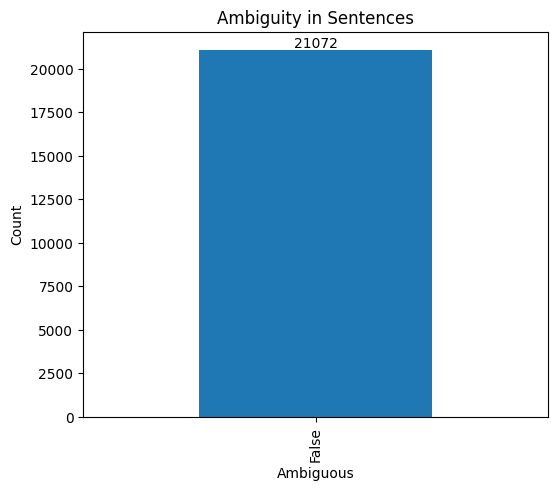

In [27]:
import matplotlib.pyplot as plt

# Counting the number of ambiguous and non-ambiguous sentences
is_ambiguous_counts = df_clean['is_ambiguous'].value_counts()

# Creating the bar chart
fig, ax = plt.subplots(figsize=(6, 5))
is_ambiguous_counts.plot(kind='bar', ax=ax)

# Labeling the chart
ax.set_title('Ambiguity in Sentences')
ax.set_xlabel('Ambiguous')
ax.set_ylabel('Count')

# Adding labels to the bars
for i, v in enumerate(is_ambiguous_counts):
    ax.text(i, v, str(v), ha='center', va='bottom')

plt.show()

In [28]:
df_clean['is_ambiguous'].head(10)

1     False
2     False
10    False
11    False
14    False
15    False
17    False
20    False
21    False
23    False
Name: is_ambiguous, dtype: bool

## Left Recursion

In [29]:
import nltk
import matplotlib.pyplot as plt
from nltk.tree import Tree

def check_left_recursion(text):
    try:
        grammar = nltk.CFG.fromstring(text)
        if any(nltk.grammar.is_leftrecursive(production) for production in grammar.productions()):
            return True
    except:
        pass
    return False


In [30]:
df_clean['has_left_recursion'] = df_clean.lemma.apply(check_left_recursion)
df_clean['has_left_recursion'].head(10)

1     False
2     False
10    False
11    False
14    False
15    False
17    False
20    False
21    False
23    False
Name: has_left_recursion, dtype: bool

# **Dependency Parsing**

In [31]:
import spacy
from spacy import displacy

# Load the English model for spaCy
nlp = spacy.load("en_core_web_sm")

# Define visualization options to reduce the size
options = {"compact": True, "color": "brown"}

# Perform dependency parsing and visualize the parse tree for each chunk
for chunk in df_clean['complaint_POS_removed'].head(1):
    # Process the chunk using spaCy
    doc = nlp(chunk)

    # Visualize the parse tree
    displacy.render(doc, style="dep", options=options, jupyter=True)

<p style="background-color: #6700c0; font-family: Franklin Gothic Medium; color: #FFF9ED; font-size: 250%; text-align: center; border-radius: 10px;">
  <a id="eda" style="color: white; text-decoration: none;">Exploratory data analysis (EDA)</a>
</p>


### **Exploratory data analysis to get familiar with the data.**

Write the code in this task to perform the following:

*   Visualise the data according to the 'Complaint' character length
*   Using a word cloud find the top 40 words by frequency among all the articles after processing the text
*   Find the top unigrams,bigrams and trigrams by frequency among all the complaints after processing the text. ‘




(array([9.236e+03, 6.356e+03, 2.725e+03, 1.276e+03, 7.570e+02, 2.750e+02,
        1.500e+02, 7.100e+01, 6.300e+01, 3.900e+01, 3.700e+01, 1.300e+01,
        1.100e+01, 1.100e+01, 8.000e+00, 8.000e+00, 7.000e+00, 2.000e+00,
        3.000e+00, 3.000e+00, 7.000e+00, 2.000e+00, 2.000e+00, 0.000e+00,
        0.000e+00, 0.000e+00, 1.000e+00, 0.000e+00, 0.000e+00, 2.000e+00,
        0.000e+00, 0.000e+00, 0.000e+00, 4.000e+00, 0.000e+00, 0.000e+00,
        0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 1.000e+00, 0.000e+00,
        0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 1.000e+00,
        0.000e+00, 1.000e+00]),
 array([    0. ,   248.5,   497. ,   745.5,   994. ,  1242.5,  1491. ,
         1739.5,  1988. ,  2236.5,  2485. ,  2733.5,  2982. ,  3230.5,
         3479. ,  3727.5,  3976. ,  4224.5,  4473. ,  4721.5,  4970. ,
         5218.5,  5467. ,  5715.5,  5964. ,  6212.5,  6461. ,  6709.5,
         6958. ,  7206.5,  7455. ,  7703.5,  7952. ,  8200.5,  8449. ,
         8697.5,  894

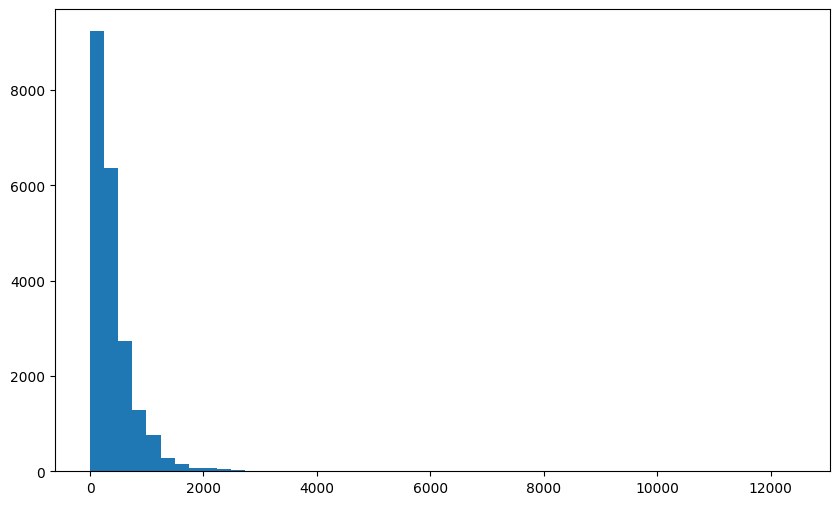

In [32]:
# Write your code here to visualise the data according to the 'Complaint' character length

plt.figure(figsize=(10,6))
doc_lens = [len(d) for d in df_clean.complaint_POS_removed]
plt.hist(doc_lens, bins = 50)

#### **Find the top 40 words by frequency among all the articles after processing the text.**

In [33]:
!pip install wordcloud

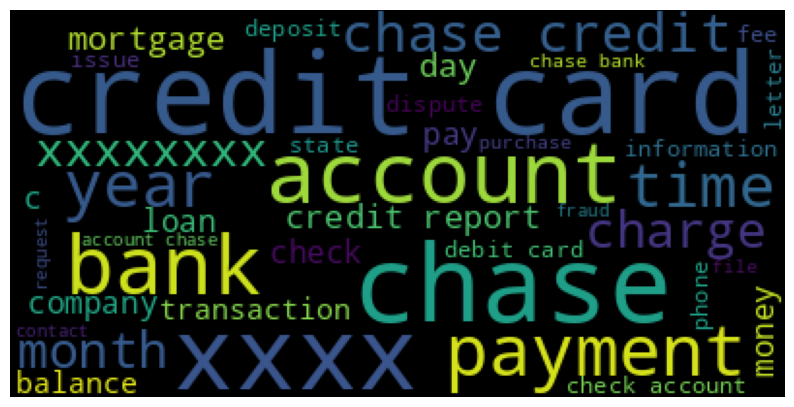

In [34]:
#Using a word cloud find the top 40 words by frequency among all the articles after processing the text

from wordcloud import WordCloud

wordcloud = WordCloud(stopwords=stopwords,max_words=40).generate(str(df_clean.complaint_POS_removed))

print(wordcloud)
plt.figure(figsize=(10,6))
plt.imshow(wordcloud)
plt.axis('off')
plt.show()

In [35]:
#Removing -PRON- from the text corpus
df_clean['Complaint_clean'] = df_clean['complaint_POS_removed'].str.replace('-PRON-', '')
df_clean = df_clean.drop(['complaint_POS_removed'],axis = 1)

<p style="background-color: #6700c0; font-family: Franklin Gothic Medium; color: #FFF9ED; font-size: 250%; text-align: center; border-radius: 10px;">
  <a id="top_uni_bi_trigram" style="color: white; text-decoration: none;">Finding the Top Unigrams, Bigrams and Trigrams</a>
</p>


# **Find the top unigrams,bigrams and trigrams by frequency among all the complaints after processing the text.**

In [36]:
# Write your code here to find the top 30 unigram,bigram,trigram frequency 
# among the complaints in the cleaned datafram(df_clean).

def get_top_n_bigram(text, ngram=1, top=None):
    vec = CountVectorizer(ngram_range=(ngram, ngram), stop_words='english').fit(text)
    bag_of_words = vec.transform(text)

    sum_words = bag_of_words.sum(axis=0) 
    words_freq = [(word, sum_words[0, idx]) for word, idx in vec.vocabulary_.items()]

    words_freq =sorted(words_freq, key = lambda x: x[1], reverse=True)
    return words_freq[:top]


In [37]:
top_30_unigrams = get_top_n_bigram(df_clean.Complaint_clean,ngram=1, top=30)
top_30_bigrams = get_top_n_bigram(df_clean.Complaint_clean,ngram=2, top=30)
top_30_trigrams = get_top_n_bigram(df_clean.Complaint_clean,ngram=3, top=30)

In [38]:
#Print the top 10 words in the unigram frequency
print('Top 10 unigrams:\n')
top_30_unigrams[:10]

Top 10 unigrams:



[('chase', 53419),
 ('account', 40961),
 ('credit', 33554),
 ('xxxx', 31291),
 ('card', 29835),
 ('payment', 21064),
 ('bank', 17038),
 ('time', 15871),
 ('charge', 15292),
 ('day', 12831)]

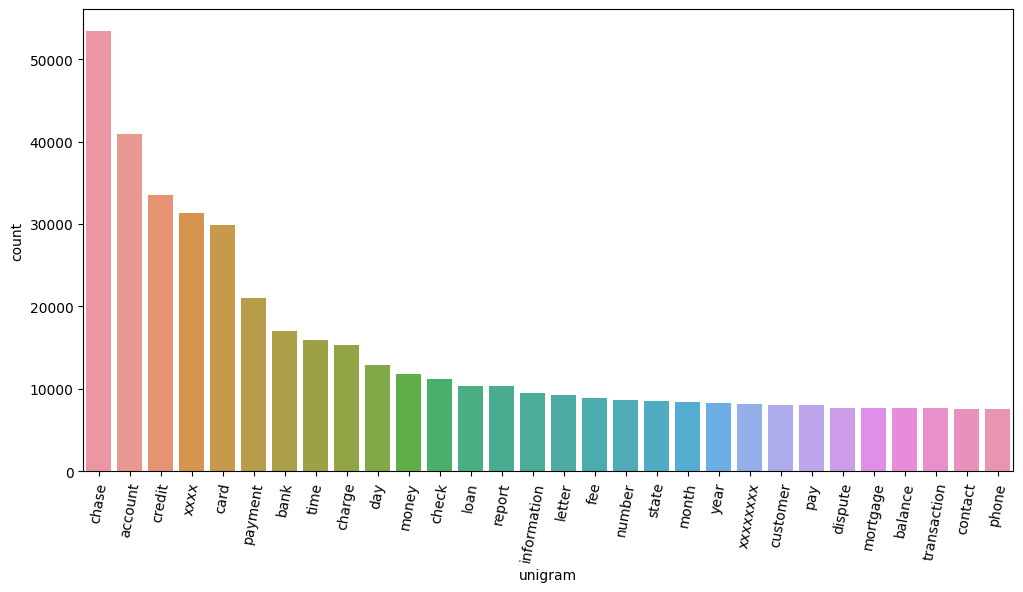

In [39]:
#Plot graph for the top 30 words in the unigram frequency
df1 = pd.DataFrame(top_30_unigrams, columns = ['unigram' , 'count'])
plt.figure(figsize=(12,6))
fig = sns.barplot(x=df1['unigram'], y=df1['count'])
plt.xticks(rotation = 80)
plt.show()

In [40]:
#Print the top 10 words in the bigram frequency
print('Top 10 bigrams:\n')
top_30_bigrams[:10]

Top 10 bigrams:



[('credit card', 12773),
 ('credit report', 3893),
 ('chase credit', 3070),
 ('customer service', 2923),
 ('account chase', 2432),
 ('chase bank', 2120),
 ('check account', 2113),
 ('chase account', 2034),
 ('xxxx xxxx', 1954),
 ('contact chase', 1893)]

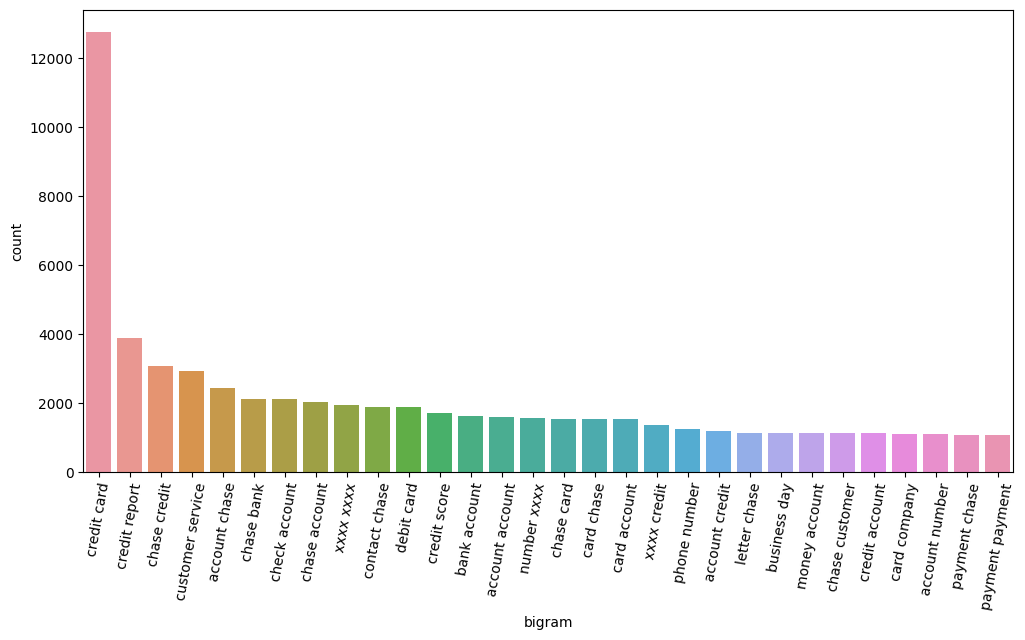

In [41]:
#Plot graph for the top 30 words in the bigram frequency
df2 = pd.DataFrame(top_30_bigrams, columns = ['bigram' , 'count'])
plt.figure(figsize=(12,6))
fig = sns.barplot(x=df2['bigram'], y=df2['count'])
plt.xticks(rotation = 80)
plt.show()

In [42]:
#Print the top 10 words in the trigram frequency
print('Top 10 trigrams:\n')
top_30_trigrams[:10]

Top 10 trigrams:



[('chase credit card', 2196),
 ('credit card account', 1050),
 ('credit card company', 978),
 ('credit card chase', 738),
 ('xxxx credit card', 653),
 ('chase customer service', 559),
 ('inquiry credit report', 483),
 ('credit card credit', 437),
 ('charge credit card', 406),
 ('credit card xxxx', 386)]

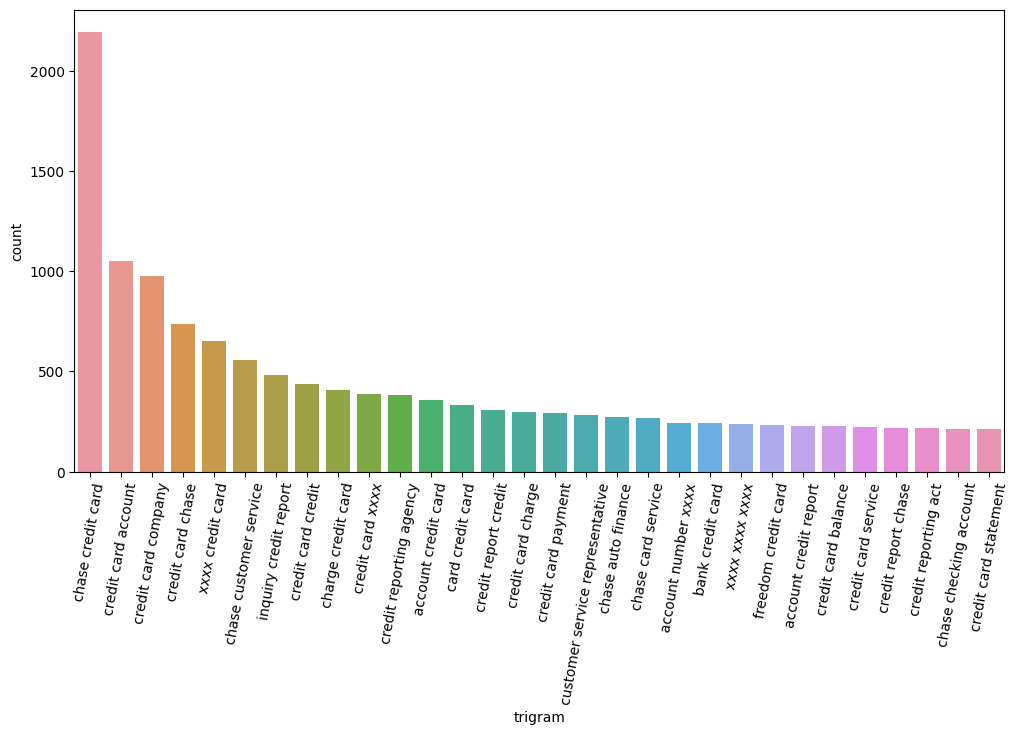

In [43]:
#Plot graph for the top 30 words in the trigram frequency
df3 = pd.DataFrame(top_30_trigrams, columns = ['trigram' , 'count'])
plt.figure(figsize=(12,6))
fig = sns.barplot(x=df3['trigram'], y=df3['count'])
plt.xticks(rotation = 80)
plt.show()

#### **The personal details of customer has been masked in the dataset with xxxx. Let's remove the masked text as this will be of no use for our analysis**

In [44]:
df_clean['Complaint_clean'] = df_clean['Complaint_clean'].str.replace('xxxx','')

In [45]:
#All masked texts has been removed
df_clean.head()

,complaint_text,lemma,category,is_ambiguous,has_left_recursion,Complaint_clean
1,good morning my name is xxxx xxxx and i apprec...,good morning xxxx xxxx appreciate help stop ch...,Debt collection+Credit card debt,False,False,morning help bank service chase debt verificat...
2,i upgraded my xxxx xxxx card in and was told b...,upgrade xxxx xxxx card tell agent upgrade anni...,Credit card or prepaid card+General-purpose cr...,False,False,card agent upgrade anniversary date change age...
10,chase card was reported on however fraudulent ...,chase card report fraudulent application submi...,"Credit reporting, credit repair services, or o...",False,False,chase card report application submit identity ...
11,on while trying to book a xxxx xxxx ticket i...,try book xxxx xxxx ticket come offer apply...,"Credit reporting, credit repair services, or o...",False,False,book ticket come offer ticket reward card info...
14,my grand son give me check for i deposit it in...,grand son check deposit chase account fund cle...,Checking or savings account+Checking account,False,False,son deposit chase account fund bank account pa...


<p style="background-color: #6700c0; font-family: Franklin Gothic Medium; color: #FFF9ED; font-size: 250%; text-align: center; border-radius: 10px;">
  <a id="feature_extraction" style="color: white; text-decoration: none;">Feature Extraction</a>
</p>


# **Feature Extraction**

### **Convert the raw texts to a matrix of TF-IDF features**

- **max_df** is used for removing terms that appear too frequently, also known as "corpus-specific stop words"
max_df = 0.95 means "ignore terms that appear in more than 95% of the complaints"

- **min_df** is used for removing terms that appear too infrequently
min_df = 2 means "ignore terms that appear in less than 2 complaints"**Convert the raw texts to a matrix of TF-IDF features**


*   **max_df** is used for removing terms that appear too frequently, also known as "corpus-specific stop words" max_df = 0.95 means "ignore terms that appear in more than 95% of the complaints"
*   **min_df** is used for removing terms that appear too infrequently min_df = 2 means "ignore terms that appear in less than 2 complaints"



In [46]:
# Initialise the TfidfVectorizer
tfidf = TfidfVectorizer(min_df=2, max_df=0.95, stop_words='english')

#### **Create a document term matrix using fit_transform**

The contents of a document term matrix are tuples of (complaint_id,token_id) tf-idf score:
The tuples that are not there have a tf-idf score of 0

In [47]:
#Write your code here to create the Document Term Matrix by transforming the complaints column present in df_clean.
dtm = tfidf.fit_transform(df_clean.Complaint_clean)

In [48]:
tfidf.get_feature_names_out()[:10]

array(['aarp', 'abandonment', 'abatement', 'abbreviation', 'abd',
       'abhorrent', 'abide', 'ability', 'abovementione', 'abovereference'],
      dtype=object)

In [49]:
len(tfidf.get_feature_names_out())

6484

<p style="background-color: #6700c0; font-family: Franklin Gothic Medium; color: #FFF9ED; font-size: 250%; text-align: center; border-radius: 10px;">
  <a id="topic_modelling" style="color: white; text-decoration: none;">Topic Modelling</a>
</p>


# **Topic Modelling**

## **Topic Modelling using NMF**

- ### **Non-Negative Matrix Factorization (NMF)** 
It is an unsupervised technique so there are no labeling of topics that the model will be trained on. The way it works is that, NMF decomposes (or factorizes) high-dimensional vectors into a lower-dimensional representation. These lower-dimensional vectors are non-negative which also means their coefficients are non-negative.

- In this task we are performing the following:

 * Find the best number of clusters 
 * Apply the best number to create word clusters
 * Inspect & validate the correction of each cluster wrt the complaints 
 * Correct the labels if needed 
 * Map the clusters to topics/cluster names

In [50]:
from sklearn.decomposition import NMF

## **Manual Topic Modeling**
 - You need to do take the trial & error approach to find the best num of topics for your NMF model.

 - The only parameter that is required is the number of components i.e. the number of topics we want. This is the most crucial step in the whole topic modeling process and will greatly affect how good your final topics are.

In [51]:
#Load your nmf_model with the n_components i.e 5
num_topics =  5 

#keep the random_state =40
nmf_model = NMF(n_components=num_topics, random_state=40)

W1 = nmf_model.fit_transform(dtm)
H1 = nmf_model.components_

In [52]:
#nmf_model.fit(dtm)
#len(tfidf.get_feature_names())

In [53]:
#Print the Top15 words for each of the topics
num_words=15

vocab = np.array(tfidf.get_feature_names_out())

top_words = lambda t: [vocab[i] for i in np.argsort(t)[:-num_words-1:-1]]
topic_words = ([top_words(t) for t in H1])
topics = [' '.join(t) for t in topic_words]

In [54]:
vocab

array(['aarp', 'abandonment', 'abatement', ..., 'zombie', 'zone', 'zoom'],
      dtype=object)

In [55]:
topics

['account check money bank deposit chase fund day branch transfer number business transaction customer claim',
 'card credit chase balance account score limit year purchase point month application service reason time',
 'payment loan mortgage chase month modification time home pay year rate balance property statement date',
 'report inquiry credit information company reporting debt account file identity remove dispute theft score letter',
 'charge dispute fee chase transaction merchant claim purchase refund fraud service email time contact statement']

In [56]:
#Create the best topic for each complaint in terms of integer value 0,1,2,3 & 4

colnames = ["Topic" + str(i) for i in range(nmf_model.n_components)]
docnames = ["Doc" + str(i) for i in range(len(df_clean.Complaint_clean))]
df_doc_topic = pd.DataFrame(np.round(W1, 2), columns=colnames, index=docnames)
significant_topic = np.argmax(df_doc_topic.values, axis=1)
df_doc_topic['dominant_topic'] = significant_topic
df_doc_topic.head()

,Topic0,Topic1,Topic2,Topic3,Topic4,dominant_topic
Doc0,0.03,0.00,0.02,0.02,0.01,0
Doc1,0.01,0.02,0.00,0.00,0.01,1
Doc2,0.00,0.03,0.00,0.04,0.00,3
Doc3,0.02,0.03,0.01,0.05,0.01,3
Doc4,0.07,0.00,0.01,0.00,0.00,0


In [57]:
#Assign the best topic to each of the cmplaints in Topic Column
df_clean['Topic'] = significant_topic

In [58]:
pd.set_option('display.max_colwidth', None)
#df_clean[['complaint_text','Complaint_clean','category','Topic']][df_clean.Topic==2].head(10)

In [59]:
df_clean[['complaint_text','Complaint_clean','category','Topic']][df_clean.Topic==4].head(30)

,complaint_text,Complaint_clean,category,Topic
21,on xxxx i made a payment to an online retailer using chase quick pay with xxxx on the chase website i realized that this was a scam website after no confirmation product or response to any inquiries regarding the order and contacted chase to get more information about the transaction to attempt getting a refund through the retailers bank \n\ni contacted chase via a secured message on explaining what happened and asked is there a way to reverse this transaction or do you have a contact at xxxx that can give me more information about the recipient that xxxx my message was reviewed and i received a response restating my original email and informing me that the transfer has been completed however as you mentioned that the website is a scam while we can handle most inquiries by email some require the expertise of another team in order to assist you better in regards to the refund we request you to call our consumer online technical support team i called the number listed in the email and explained my situation to then be transferred to the claims department i was directed to call xxxx and ask them about the transaction because chase did not have any information outside of what i provided when initiating the transfer i felt like this agent was trying to get me to end the call as quickly as possible and i had to interrupt her closing script to ask for a contact number at xxxx and didnt have an opportunity to get any information about what the right questions would be to ask xxxx or what words and phrases i should use to get the information i was looking for \n\ni called xxxx whos automated system initially directed me to call my bank because i used the banks app to initiate the transaction i called xxxx again to navigate their menus and talk to a customer service agent they told me that all of the information about the transaction would in chase s system because i used the banks app to perform the transaction she stayed on the line with me until i understood everything that i should ask and had a better understanding of the situation i ended the call and called chase again \n\nwhen i called chase the second time the agent tried to look up the information about the receiving bank but could not find any additional information she then asked me why i needed this information and i explained my situation again i was once again transferred to the claims department who told me that i needed to contact xxxx to get the information i was looking for after i told her that i had already contacted them she finally admitted that there was nothing that she could do due to the nature of the transaction and that these types of transactions are not secured she said that chase had no information about the recipient other than the email address that i inputted and that the recipients banking information was not kept in the system in both phone calls they asked if i initiated that transaction and used that to absolve themselves of all responsibility in regards to this matter \n\nduring this whole process it felt like chase was not transparent about their policies regarding these types of transactions nor were they helpful in helping me get any information about the situation these transactions are advertised as a fast safe and easy way to send money but seem to be a dangerous way to do business i feel deceived by chase s advertising and further victimized by the way i was treated by the members on their customer service team,payment retailer chase pay website scam website confirmation product response inquiry order contact chase information transaction attempt retailer bank contact chase message way transaction contact information recipient message review response email transfer mention website scam inquiry email expertise team order request consumer support team number list email situation transfer claim transaction chase information initiate transfer agent try closing script contact number opportunity i

In [60]:
# Print the first 10 Complaint for each of the Topics
temp =df_clean[['complaint_text','Complaint_clean','category','Topic']].groupby('Topic').head(10)
temp.sort_values('Topic')

,complaint_text,Complaint_clean,category,Topic
1,good morning my name is xxxx xxxx and i appreciate it if you could help me put a stop to chase bank cardmember services \nin i wrote to chase asking for debt verification and what they sent me a statement which is not acceptable i am asking the bank to validate the debt instead i been receiving mail every month from them attempting to collect a debt \ni have a right to know this information as a consumer \n\nchase account xxxx xxxx xxxx xxxx thanks in advance for your help,morning help bank service chase debt verification statement bank validate debt mail month attempt debt information consumer chase account help,Debt collection+Credit card debt,0
69,someone called stating i had felony committed under my social security number and name took xxxx out of my checking account to secure my assets stating from police department,state felony security number check account asset state police department,Checking or savings account+Checking account,0
14,my grand son give me check for i deposit it into my chase account after fund clear my chase bank closed my account never paid me my money they said they need to speek with my grand son check was clear money was taking by my chase bank refuse to pay me my money my grand son called chase times they told him i should call not him to verify the check owner he is out the country most the time date happen check number xxxx claim number is xxxx with chase,son deposit chase account fund bank account pay money speek son money bank money son call chase time check owner country time date check number claim number chase,Checking or savings account+Checking account,0
17,with out notice jp morgan chase restricted my account by my debit card tuesday on thursday i went into a branch after being advised by a customer service representative that my account would actually be closed i went into the branch to see how i can remove the funds that are in there currently in as well as if my direct deposit from my place of employment would be returned the bank associate and the customer service representative assured me that the funds would post but they may take an additional business day that saturday i attempted to go inside of a branch yet again to retrieve my funds that actually did post on friday upon looking at my account i realize that the funds have been reversed and no longer were present on my current statement ive been called and i was told that it may take two business day stating tuesday xxxxxxxx would be the date that my funds would be available to withdraw from a bank teller only now chase is informing me that i will be mailed a check into the three business days to recover the funds that are owed to me and left in my account currently unfortunately this has put me in an additional financial bind do two fees from late rent late car payments etc i am not being a short or giving written notice that these things will actually occur so that i have peace of mind in fact chase has handled my situation grossly i even had a bank teller inform me that my account looks suspicious after giving me a suspicious look myself although i know that chase reserves the right to close my account at any time i do believe that their protocol has been in the past to give notice in the form of a written document i am not being a shored or giving written notice that these things will actually occur so that i have peace of mind in fact chase has handled my situation grossly i even had a bank teller inform me that my account looks suspicious after giving me a suspicious look myself although i know that chase reserves the right to close my account at any time i do believe that their protocol has been in the past to give notice in the form of a written document this situation is truly affecting my livelihood and they dont seem to want to deal with me professionally thank you,account debit card branch customer service representative account branch remove fund deposit place employm

#### **After evaluating the mapping, if the topics assigned are correct then assign these names to the relevant topic:**
* Bank Account services
* Credit card or prepaid card
* Theft/Dispute Reporting
* Mortgage/Loan
* Others

In [61]:
#Create the dictionary of Topic names and Topics
topic_mapping = {
    0: 'Bank Account services',
    1: 'Credit card or prepaid card',
    2: 'Others',
    3: 'Theft/Dispute Reporting',
    4: 'Mortgage/Loan'
}

#Replace Topics with Topic Names
df_clean['Topic'] = df_clean['Topic'].map(topic_mapping)

In [62]:
df_clean.head()

,complaint_text,lemma,category,is_ambiguous,has_left_recursion,Complaint_clean,Topic
1,good morning my name is xxxx xxxx and i appreciate it if you could help me put a stop to chase bank cardmember services \nin i wrote to chase asking for debt verification and what they sent me a statement which is not acceptable i am asking the bank to validate the debt instead i been receiving mail every month from them attempting to collect a debt \ni have a right to know this information as a consumer \n\nchase account xxxx xxxx xxxx xxxx thanks in advance for your help,good morning xxxx xxxx appreciate help stop chase bank cardmember service \n write chase ask debt verification send statement acceptable ask bank validate debt instead receive mail month attempt collect debt \n right know information consumer \n\n chase account xxxx xxxx xxxx xxxx thank advance help,Debt collection+Credit card debt,False,False,morning help bank service chase debt verification statement bank validate debt mail month attempt debt information consumer chase account help,Bank Account services
2,i upgraded my xxxx xxxx card in and was told by the agent who did the upgrade my anniversary date would not change it turned the agent was giving me the wrong information in order to upgrade the account xxxx changed my anniversary date from xxxxxxxx to xxxxxxxx without my consent xxxx has the recording of the agent who was misled me,upgrade xxxx xxxx card tell agent upgrade anniversary date change turn agent give wrong information order upgrade account xxxx change anniversary date xxxxxxxx xxxxxxxx consent xxxx recording agent mislead,Credit card or prepaid card+General-purpose credit card or charge card,False,False,card agent upgrade anniversary date change agent information order account anniversary date agent,Credit card or prepaid card
10,chase card was reported on however fraudulent application have been submitted my identity without my consent to fraudulently obtain services do not extend credit without verifying the identity of the applicant,chase card report fraudulent application submit identity consent fraudulently obtain service extend credit verify identity applicant,"Credit reporting, credit repair services, or other personal consumer reports+Other personal consumer report",False,False,chase card report application submit identity consent service extend credit verify identity applicant,Theft/Dispute Reporting
11,on while trying to book a xxxx xxxx ticket i came across an offer for to be applied towards the ticket if i applied for a rewards card i put in my information for the offer and within less than a minute was notified via the screen that a decision could not be made i immediately contacted xxxx and was referred to chase bank i then immediately contacted chase bank within no more than of getting the notification on the screen and i was told by the chase representative i spoke with that my application was denied but she could not state why i asked for more information about the xxxx offer and she explained that even if i had been approved the credit offer only gets applied after the first account statement and could not be used to purchase the ticket i then explicitly told her i was glad i got denied and i was absolutely no longer interested in the account i asked that the application be withdrawn and the representative obliged this all happened no later than after putting in the application on notwithstanding my explicit request not to proceed with the application and contrary to what i was told by the chase representative chase did in fact go ahead to open a credit account in my name on this is now being reported in my credit report and chase has refused to correct this information on my credit report even though they went ahead to process an application which i did not consent to and out of their error,try book xxxx xxxx ticket come offer apply ticket apply reward card information offer minute notify screen decision immediately contact xxxx refer cha

#### **Lets check if there is any class imbalance**

<Axes: xlabel='Topic', ylabel='count'>

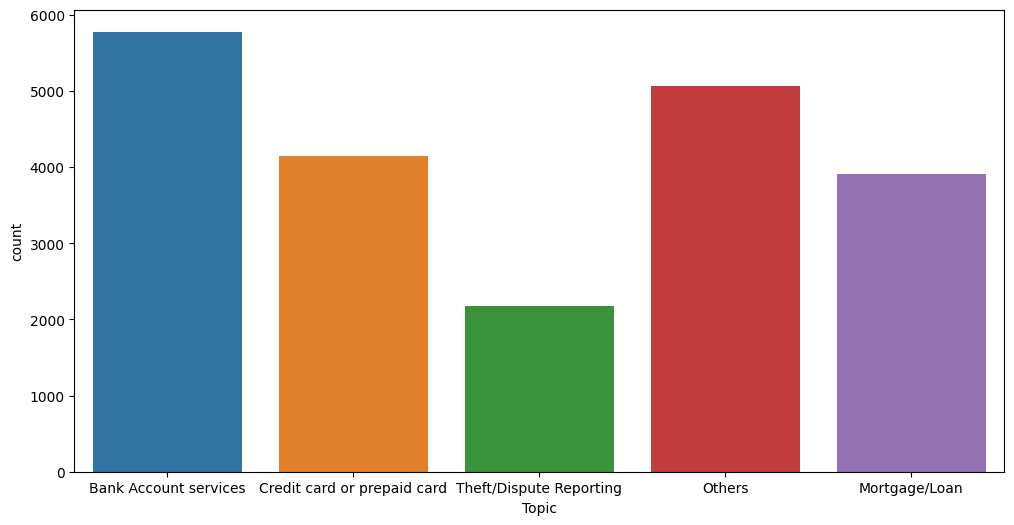

In [63]:
# Plot graph to check class imbalance
plt.figure(figsize=(12,6))
sns.countplot(x='Topic',data=df_clean)

<p style="background-color: #6700c0; font-family: Franklin Gothic Medium; color: #FFF9ED; font-size: 250%; text-align: center; border-radius: 10px;">
  <a id="model" style="color: white; text-decoration: none;">Model training and evaluation</a>
</p>

# **Model building using supervised learning, Model training & evaluation**



## **Supervised model to predict any new complaints to the relevant Topics.**

- We now build the model to create the topics for each complaints.Now in the below section you will use them to classify any new complaints.

- Since you will be using supervised learning technique we have to convert the topic names to numbers(numpy arrays only understand numbers)

<p style="background-color: #000000; font-family: Franklin Gothic Medium; color: #FFF9ED; font-size: 200%; text-align: center; border-radius: 10px;">
  <a id="preprocessing_4_model" style="color: white; text-decoration: none;">Preprocessing for model</a>
</p>


In [64]:
#Keep the columns"complaint_what_happened" & "Topic" only in the new dataframe --> training_data

training_data = df_clean[['complaint_text','Topic']]

In [65]:
training_data.head()

,complaint_text,Topic
1,good morning my name is xxxx xxxx and i appreciate it if you could help me put a stop to chase bank cardmember services \nin i wrote to chase asking for debt verification and what they sent me a statement which is not acceptable i am asking the bank to validate the debt instead i been receiving mail every month from them attempting to collect a debt \ni have a right to know this information as a consumer \n\nchase account xxxx xxxx xxxx xxxx thanks in advance for your help,Bank Account services
2,i upgraded my xxxx xxxx card in and was told by the agent who did the upgrade my anniversary date would not change it turned the agent was giving me the wrong information in order to upgrade the account xxxx changed my anniversary date from xxxxxxxx to xxxxxxxx without my consent xxxx has the recording of the agent who was misled me,Credit card or prepaid card
10,chase card was reported on however fraudulent application have been submitted my identity without my consent to fraudulently obtain services do not extend credit without verifying the identity of the applicant,Theft/Dispute Reporting
11,on while trying to book a xxxx xxxx ticket i came across an offer for to be applied towards the ticket if i applied for a rewards card i put in my information for the offer and within less than a minute was notified via the screen that a decision could not be made i immediately contacted xxxx and was referred to chase bank i then immediately contacted chase bank within no more than of getting the notification on the screen and i was told by the chase representative i spoke with that my application was denied but she could not state why i asked for more information about the xxxx offer and she explained that even if i had been approved the credit offer only gets applied after the first account statement and could not be used to purchase the ticket i then explicitly told her i was glad i got denied and i was absolutely no longer interested in the account i asked that the application be withdrawn and the representative obliged this all happened no later than after putting in the application on notwithstanding my explicit request not to proceed with the application and contrary to what i was told by the chase representative chase did in fact go ahead to open a credit account in my name on this is now being reported in my credit report and chase has refused to correct this information on my credit report even though they went ahead to process an application which i did not consent to and out of their error,Theft/Dispute Reporting
14,my grand son give me check for i deposit it into my chase account after fund clear my chase bank closed my account never paid me my money they said they need to speek with my grand son check was clear money was taking by my chase bank refuse to pay me my money my grand son called chase times they told him i should call not him to verify the check owner he is out the country most the time date happen check number xxxx claim number is xxxx with chase,Bank Account services


<p style="background-color: #FF0068; font-family: Franklin Gothic Medium; color: #FFF9ED; font-size: 150%; text-align: center; border-radius: 10px;">
  <a id="reverse_topic_names_mapping" style="color: white; text-decoration: none;">Reverse topic names mapping for supervised learning</a>
</p>


## **Reverse topic names mapping for supervised learning**

In [66]:
## Reverse topic names mapping for supervised learning

reverse_topic_mapping = {
    'Bank Account services' :0,
    'Credit card or prepaid card':1,
    'Others':2,
    'Theft/Dispute Reporting':3,
    'Mortgage/Loan':4
}
#Replace Topics with Topic Names
training_data['Topic'] = training_data['Topic'].map(reverse_topic_mapping)
training_data.head()

,complaint_text,Topic
1,good morning my name is xxxx xxxx and i appreciate it if you could help me put a stop to chase bank cardmember services \nin i wrote to chase asking for debt verification and what they sent me a statement which is not acceptable i am asking the bank to validate the debt instead i been receiving mail every month from them attempting to collect a debt \ni have a right to know this information as a consumer \n\nchase account xxxx xxxx xxxx xxxx thanks in advance for your help,0
2,i upgraded my xxxx xxxx card in and was told by the agent who did the upgrade my anniversary date would not change it turned the agent was giving me the wrong information in order to upgrade the account xxxx changed my anniversary date from xxxxxxxx to xxxxxxxx without my consent xxxx has the recording of the agent who was misled me,1
10,chase card was reported on however fraudulent application have been submitted my identity without my consent to fraudulently obtain services do not extend credit without verifying the identity of the applicant,3
11,on while trying to book a xxxx xxxx ticket i came across an offer for to be applied towards the ticket if i applied for a rewards card i put in my information for the offer and within less than a minute was notified via the screen that a decision could not be made i immediately contacted xxxx and was referred to chase bank i then immediately contacted chase bank within no more than of getting the notification on the screen and i was told by the chase representative i spoke with that my application was denied but she could not state why i asked for more information about the xxxx offer and she explained that even if i had been approved the credit offer only gets applied after the first account statement and could not be used to purchase the ticket i then explicitly told her i was glad i got denied and i was absolutely no longer interested in the account i asked that the application be withdrawn and the representative obliged this all happened no later than after putting in the application on notwithstanding my explicit request not to proceed with the application and contrary to what i was told by the chase representative chase did in fact go ahead to open a credit account in my name on this is now being reported in my credit report and chase has refused to correct this information on my credit report even though they went ahead to process an application which i did not consent to and out of their error,3
14,my grand son give me check for i deposit it into my chase account after fund clear my chase bank closed my account never paid me my money they said they need to speek with my grand son check was clear money was taking by my chase bank refuse to pay me my money my grand son called chase times they told him i should call not him to verify the check owner he is out the country most the time date happen check number xxxx claim number is xxxx with chase,0


In [67]:
training_data[['complaint_text','Topic']][training_data.Topic==2].head(30)

complaint_text  \
20                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                            

#### **Apply the supervised models on the training data created. In this process, you have to do the following:**
* Create the vector counts using Count Vectoriser
* Transform the word vecotr to tf-idf
* Create the train & test data using the train_test_split on the tf-idf & topics


<p style="background-color: #FF0068; font-family: Franklin Gothic Medium; color: #FFF9ED; font-size: 150%; text-align: center; border-radius: 10px;">
  <a id="xy_split" style="color: white; text-decoration: none;">X-Y Split</a>
</p>


## **X - Y split**

In [68]:
# x - y  split
X = training_data.complaint_text
y = training_data.Topic

In [69]:
#Write your code to get the Vector count 

# Fit transform the X
count_vect = CountVectorizer()
X_vect = count_vect.fit_transform(X)

In [70]:
from sklearn.feature_extraction.text import TfidfTransformer
#Write your code here to transform the word vector to tf-idf
#Fit transform word vector to TF-IDF
tfidf_transformer = TfidfTransformer()
X_tfidf = tfidf_transformer.fit_transform(X_vect)


<p style="background-color: #FF0068; font-family: Franklin Gothic Medium; color: #FFF9ED; font-size: 150%; text-align: center; border-radius: 10px;">
  <a id="train_test_split" style="color: white; text-decoration: none;">Train Test Split</a>
</p>


## **Train Test Split**

In [71]:
from sklearn.model_selection import train_test_split
# train test split
X_train, X_test, y_train, y_test = train_test_split(X_tfidf, y, test_size=0.25, random_state=40, stratify=y)

You have to try atleast 3 models on the train & test data from these options:
#### **We are trying the following models** - 
* Logistic regression
* Decision Tree
* Random Forest
* Naive Bayes (optional)

**Using the required evaluation metrics judge the tried models and select the ones performing the best**

<p style="background-color: #FF0068; font-family: Franklin Gothic Medium; color: #FFF9ED; font-size: 150%; text-align: center; border-radius: 10px;">
  <a id="logistic_regression_Decision_tree_random_forest" style="color: white; text-decoration: none;">Logistic regression, Decision Tree & Random Forest</a>
</p>


## **Logistic regression, Decision Tree & Random Forest**

In [72]:
# Write your code here to build any 3 models and evaluate them using the required metrics

from sklearn.naive_bayes import MultinomialNB
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier


from sklearn.model_selection import StratifiedKFold
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import GridSearchCV

from sklearn import metrics
from sklearn.metrics import roc_auc_score
from sklearn.metrics import accuracy_score
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import precision_recall_fscore_support

from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.metrics import ConfusionMatrixDisplay


<p style="background-color: #FF0068; font-family: Franklin Gothic Medium; color: #FFF9ED; font-size: 150%; text-align: center; border-radius: 10px;">
  <a id="custom_classification_report" style="color: white; text-decoration: none;">Custom Classification Report</a>
</p>


## **Custom Classification Report**

In [73]:
# utlity function to display the model report

def display_classification_report(model,metric):
    
    y_train_pred_proba = model.predict_proba(X_train)
    y_test_pred_proba = model.predict_proba(X_test)
    roc_auc_score_train = round(roc_auc_score(y_train, y_train_pred_proba,average='weighted',multi_class='ovr'),2)
    roc_auc_score_test = round(roc_auc_score(y_test, y_test_pred_proba,average='weighted',multi_class='ovr'),2)
    print("ROC AUC Score Train:", roc_auc_score_train)
    print("ROC AUC Score Test:", roc_auc_score_test)
    metric.append(roc_auc_score_train)
    metric.append(roc_auc_score_test)

    y_train_pred = model.predict(X_train)
    y_test_pred = model.predict(X_test)
  
    precision_train,recall_train,fscore_train,support_train=precision_recall_fscore_support(y_train,y_train_pred,average='weighted')
    precision_test,recall_test,fscore_test,support_test=precision_recall_fscore_support(y_test,y_test_pred,average='weighted')
    
    acc_score_train = round(accuracy_score(y_train,y_train_pred),2)
    acc_score_test = round(accuracy_score(y_test,y_test_pred),2)
    
    metric.append(acc_score_train)
    metric.append(acc_score_test)
    metric.append(round(precision_train,2))
    metric.append(round(precision_test,2))
    metric.append(round(recall_train,2))
    metric.append(round(recall_test,2))
    metric.append(round(fscore_train,2))
    metric.append(round(fscore_test,2))
    
    print('Train Accuracy :',acc_score_train)
    print('Test Accuracy :',acc_score_test)
        
    model_report_train = classification_report(y_train,y_train_pred)
    model_report_test = classification_report(y_test,y_test_pred)
    
    print('Classification Report for Train:\n',model_report_train)
    print('Classification Report for Test:\n',model_report_test)


    # Plot the confusion matrix
    fig, ax = plt.subplots(figsize=(12, 8))
    # Create the confusion matrix
    cm = confusion_matrix(y_test, y_test_pred)
    cmp = ConfusionMatrixDisplay(cm, display_labels=model.classes_)
    cmp.plot(ax=ax)
    plt.xticks(rotation=80)

    plt.show();

<p style="background-color: #FF0068; font-family: Franklin Gothic Medium; color: #FFF9ED; font-size: 150%; text-align: center; border-radius: 10px;">
  <a id="StratifiedKFold" style="color: white; text-decoration: none;">Stratified KFold Cross Validation</a>
</p>


## **Stratified KFold Cross Validation**

In [74]:
# create 5 folds
folds = StratifiedKFold(n_splits = 5, shuffle = True, random_state = 40)

<p style="background-color: #FF0068; font-family: Franklin Gothic Medium; color: #FFF9ED; font-size: 150%; text-align: center; border-radius: 10px;">
  <a id="GridSearchCV" style="color: white; text-decoration: none;">Custom GridSearchCV</a>
</p>


## **Custom GridSearchCV**

In [75]:
# utility method to get the GridSearchCV object
def grid_search(model,folds,params,scoring):
    
    grid_search = GridSearchCV(model,
                                cv=folds, 
                                param_grid=params, 
                                scoring=scoring, 
                                n_jobs=-1, verbose=1)
    return grid_search

In [76]:
# utility function to display the best score and parameters of the GridSearchCV model
def print_best_score_params(model):
    print("Best Score: ", model.best_score_)
    print("Best Hyperparameters: ", model.best_params_)

<p style="background-color: #FF0068; font-family: Franklin Gothic Medium; color: #FFF9ED; font-size: 150%; text-align: center; border-radius: 10px;">
  <a id="multinomial_naivebayes_classification" style="color: white; text-decoration: none;">Multinomial Naive Bayes Classification</a>
</p>


## **Multinomial Naive Bayes Classification**

ROC AUC Score Train: 0.95
ROC AUC Score Test: 0.93
Train Accuracy : 0.68
Test Accuracy : 0.64
Classification Report for Train:
               precision    recall  f1-score   support

           0       0.56      0.96      0.71      4332
           1       0.81      0.50      0.62      3110
           2       0.74      0.89      0.81      3802
           3       0.97      0.20      0.34      1632
           4       0.88      0.47      0.62      2928

    accuracy                           0.68     15804
   macro avg       0.79      0.60      0.62     15804
weighted avg       0.76      0.68      0.66     15804

Classification Report for Test:
               precision    recall  f1-score   support

           0       0.52      0.95      0.67      1444
           1       0.77      0.41      0.54      1037
           2       0.71      0.85      0.78      1267
           3       0.96      0.17      0.29       544
           4       0.86      0.40      0.55       976

    accuracy            

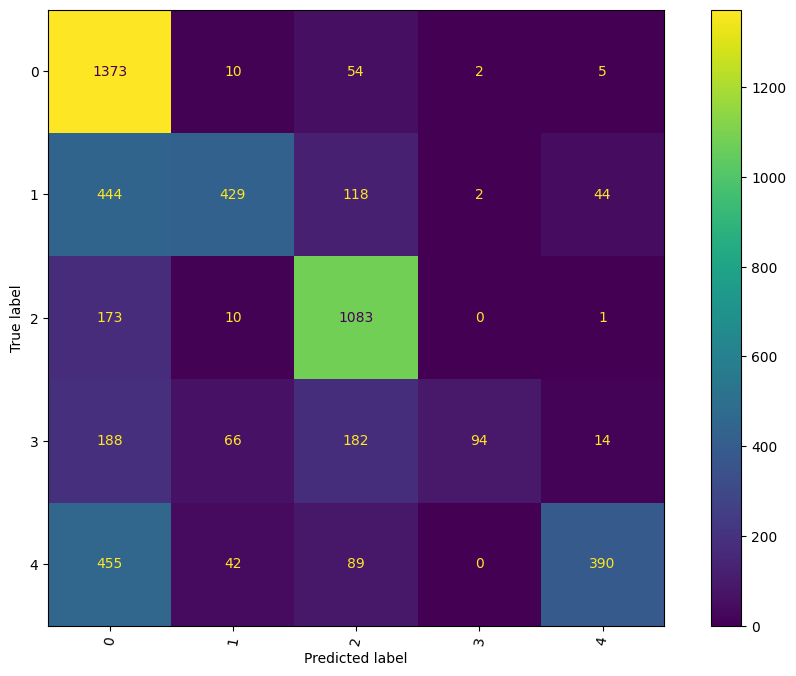

In [77]:
# Multinomial Naive Bayes Classification

# create MNB model object
mnb = MultinomialNB()
# fit model
mnb.fit(X_train, y_train)
# display classification report
metric1=[]
display_classification_report(mnb,metric1)

<p style="background-color: #FF0068; font-family: Franklin Gothic Medium; color: #FFF9ED; font-size: 150%; text-align: center; border-radius: 10px;">
  <a id="logistic_regression_classification" style="color: white; text-decoration: none;">Logistic Regression Classification</a>
</p>


## **Logistic Regression Classification**

ROC AUC Score Train: 1.0
ROC AUC Score Test: 0.99
Train Accuracy : 0.95
Test Accuracy : 0.9
Classification Report for Train:
               precision    recall  f1-score   support

           0       0.93      0.97      0.95      4332
           1       0.95      0.94      0.95      3110
           2       0.95      0.98      0.96      3802
           3       0.95      0.88      0.92      1632
           4       0.95      0.91      0.93      2928

    accuracy                           0.95     15804
   macro avg       0.95      0.94      0.94     15804
weighted avg       0.95      0.95      0.95     15804

Classification Report for Test:
               precision    recall  f1-score   support

           0       0.89      0.93      0.91      1444
           1       0.91      0.89      0.90      1037
           2       0.92      0.96      0.94      1267
           3       0.93      0.81      0.87       544
           4       0.89      0.85      0.87       976

    accuracy              

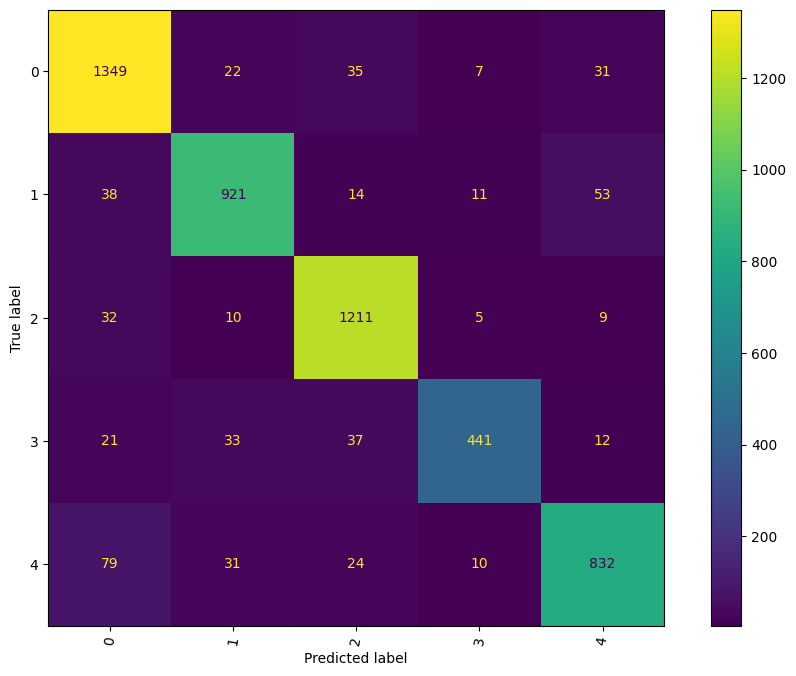

In [78]:
# Logistic Regression Classification
log_reg = LogisticRegression(random_state=40,solver='liblinear')
# fit model
log_reg.fit(X_train,y_train)
# display classification report
metric2=[]
display_classification_report(log_reg,metric2)

<p style="background-color: #FF0068; font-family: Franklin Gothic Medium; color: #FFF9ED; font-size: 150%; text-align: center; border-radius: 10px;">
  <a id="decision_tree_classification" style="color: white; text-decoration: none;">Decision Tree Classification</a>
</p>


## **Decision Tree Classification**

ROC AUC Score Train: 1.0
ROC AUC Score Test: 0.85
Train Accuracy : 1.0
Test Accuracy : 0.76
Classification Report for Train:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00      4332
           1       1.00      1.00      1.00      3110
           2       1.00      1.00      1.00      3802
           3       1.00      1.00      1.00      1632
           4       1.00      1.00      1.00      2928

    accuracy                           1.00     15804
   macro avg       1.00      1.00      1.00     15804
weighted avg       1.00      1.00      1.00     15804

Classification Report for Test:
               precision    recall  f1-score   support

           0       0.77      0.77      0.77      1444
           1       0.75      0.76      0.76      1037
           2       0.83      0.83      0.83      1267
           3       0.74      0.75      0.74       544
           4       0.67      0.67      0.67       976

    accuracy              

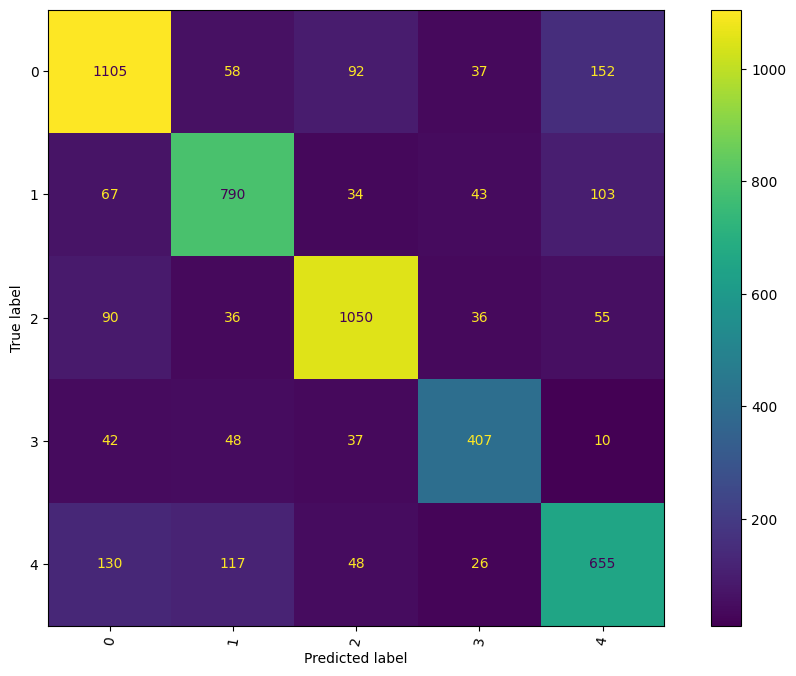

In [79]:
# Decision Tree Classification
dtc = DecisionTreeClassifier(random_state=40)
# fit model
dtc.fit(X_train,y_train)
# Decision Tree Classification Report
metric3=[]
display_classification_report(dtc,metric3)

<p style="background-color: #FF0068; font-family: Franklin Gothic Medium; color: #FFF9ED; font-size: 150%; text-align: center; border-radius: 10px;">
  <a id="random_forest_classification" style="color: white; text-decoration: none;">Random Forest Classification</a>
</p>


## **Random Forest Classification**

OOB SCORE : 0.8251075677043787
ROC AUC Score Train: 1.0
ROC AUC Score Test: 0.98
Train Accuracy : 1.0
Test Accuracy : 0.83
Classification Report for Train:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00      4332
           1       1.00      1.00      1.00      3110
           2       1.00      1.00      1.00      3802
           3       1.00      1.00      1.00      1632
           4       1.00      1.00      1.00      2928

    accuracy                           1.00     15804
   macro avg       1.00      1.00      1.00     15804
weighted avg       1.00      1.00      1.00     15804

Classification Report for Test:
               precision    recall  f1-score   support

           0       0.78      0.93      0.85      1444
           1       0.84      0.78      0.81      1037
           2       0.85      0.91      0.88      1267
           3       0.92      0.69      0.79       544
           4       0.86      0.72      0.78       

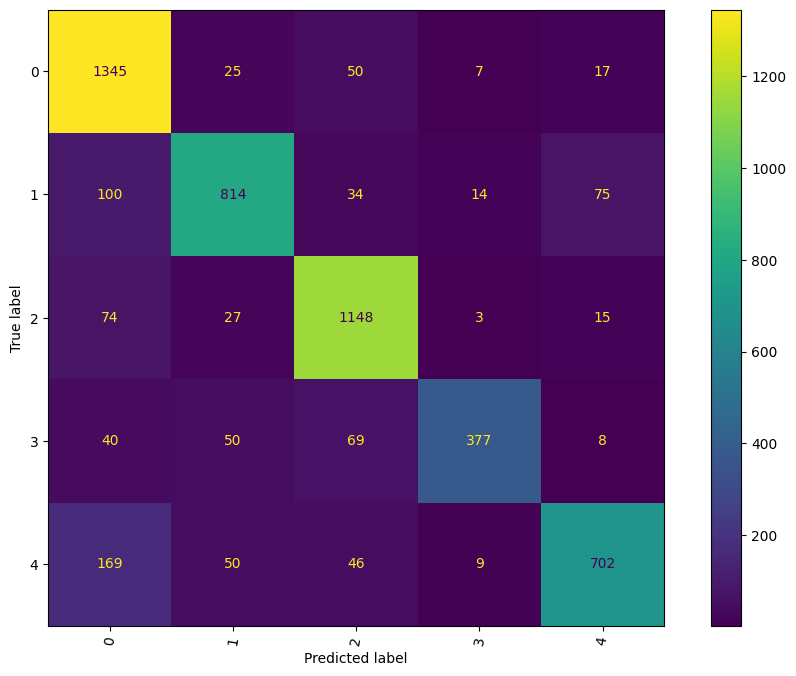

In [80]:
# Random Forest Classification

rf = RandomForestClassifier(n_estimators = 500,random_state=40, n_jobs = -1,oob_score=True)
# fit model
rf.fit(X_train,y_train)

# oob score
print('OOB SCORE :',rf.oob_score_)

# Random Forest Classification Report
metric4=[]
display_classification_report(rf,metric4)

<p style="background-color: #000000; font-family: Franklin Gothic Medium; color: #FFF9ED; font-size: 200%; text-align: center; border-radius: 10px;">
  <a id="Hyperparameter_tuning_GridSearchCV" style="color: white; text-decoration: none;">Hyper parameter tuning with GridSearchCV</a>
</p>


# **Hyper parameter tuning with GridSearchCV**

<p style="background-color: #FF0068; font-family: Franklin Gothic Medium; color: #FFF9ED; font-size: 150%; text-align: center; border-radius: 10px;">
  <a id="multinomial_naivebayes_gridsearchcv" style="color: white; text-decoration: none;">Multinomial Naive Bayes with GridSearchCV</a>
</p>


## **Multinomial Naive Bayes with GridSearchCV**

Fitting 5 folds for each of 5 candidates, totalling 25 fits
Best Score:  0.7549978976369439
Best Hyperparameters:  {'alpha': 0.1}
ROC AUC Score Train: 0.98
ROC AUC Score Test: 0.95
Train Accuracy : 0.85
Test Accuracy : 0.76
Classification Report for Train:
               precision    recall  f1-score   support

           0       0.81      0.93      0.87      4332
           1       0.85      0.79      0.82      3110
           2       0.86      0.91      0.88      3802
           3       0.89      0.70      0.78      1632
           4       0.89      0.80      0.84      2928

    accuracy                           0.85     15804
   macro avg       0.86      0.83      0.84     15804
weighted avg       0.85      0.85      0.85     15804

Classification Report for Test:
               precision    recall  f1-score   support

           0       0.72      0.87      0.79      1444
           1       0.73      0.61      0.66      1037
           2       0.78      0.87      0.82      1267
   

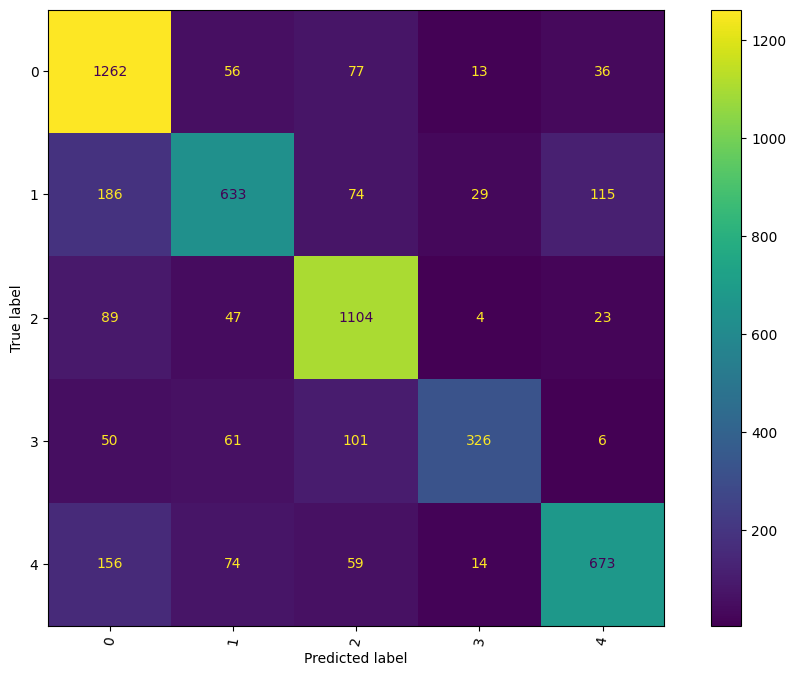

In [81]:
# Multinomial Naive Bayes with GridSearchCV

mnb = MultinomialNB()

mnb_params = {  
'alpha': (1, 0.1, 0.01, 0.001, 0.0001)  
}

# create gridsearch object
grid_search_mnb = grid_search(mnb, folds, mnb_params, scoring=None)

# fit model
grid_search_mnb.fit(X_train, y_train)

# print best hyperparameters
print_best_score_params(grid_search_mnb)

# Random Forest Classification Report
metric5=[]
display_classification_report(grid_search_mnb,metric5)

<p style="background-color: #FF0068; font-family: Franklin Gothic Medium; color: #FFF9ED; font-size: 150%; text-align: center; border-radius: 10px;">
  <a id="logistic_regression_gridsearchcv" style="color: white; text-decoration: none;">Logistic Regression with GridSearchCV</a>
</p>


## **Logistic Regression with GridSearchCV**

Fitting 5 folds for each of 18 candidates, totalling 90 fits


/opt/conda/lib/python3.10/site-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/opt/conda/lib/python3.10/site-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/opt/conda/lib/python3.10/site-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/opt/conda/lib/python3.10/site-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/opt/conda/lib/python3.10/site-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/opt/conda/lib/python3.10/site-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which 

Best Score:  0.9212220135432225
Best Hyperparameters:  {'C': 1, 'penalty': 'l1', 'solver': 'saga'}
ROC AUC Score Train: 1.0
ROC AUC Score Test: 0.99
Train Accuracy : 0.94
Test Accuracy : 0.93
Classification Report for Train:
               precision    recall  f1-score   support

           0       0.94      0.95      0.94      4332
           1       0.93      0.94      0.93      3110
           2       0.95      0.96      0.96      3802
           3       0.93      0.90      0.91      1632
           4       0.93      0.91      0.92      2928

    accuracy                           0.94     15804
   macro avg       0.94      0.93      0.93     15804
weighted avg       0.94      0.94      0.94     15804

Classification Report for Test:
               precision    recall  f1-score   support

           0       0.93      0.93      0.93      1444
           1       0.92      0.92      0.92      1037
           2       0.95      0.97      0.96      1267
           3       0.91      0.88  

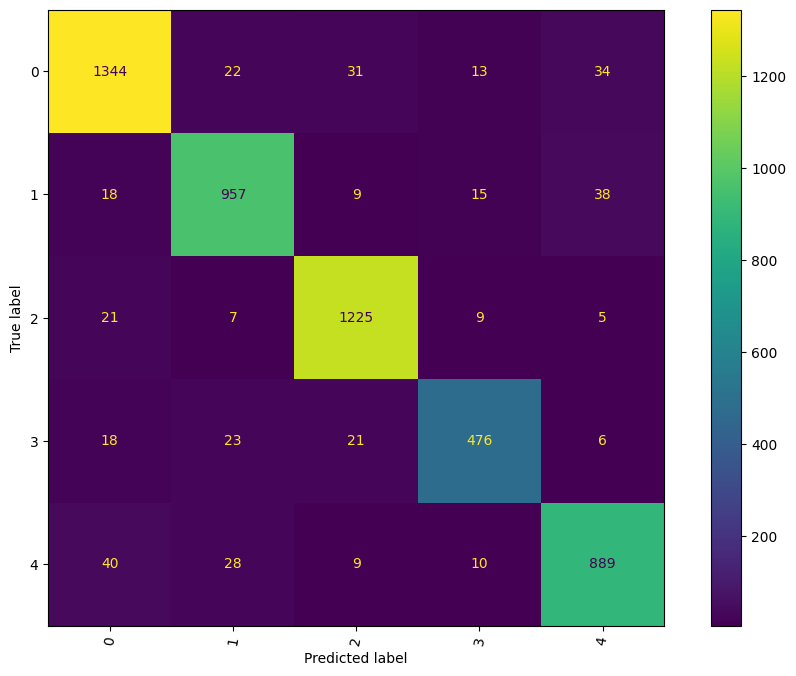

In [82]:
# Logistic Regression with GridSearchCV

# logistic regression
log_reg = LogisticRegression()

# hyperparameter for Logistic Regression
log_params = {'C': [0.01, 1, 10], 
          'penalty': ['l1', 'l2'],
          'solver': ['liblinear','newton-cg','saga']
         }

# create gridsearch object
grid_search_log = grid_search(log_reg, folds, log_params, scoring=None)

# fit model
grid_search_log.fit(X_train, y_train)

# print best hyperparameters
print_best_score_params(grid_search_log)

# Random Forest Classification Report
metric6=[]
display_classification_report(grid_search_log,metric6)

<p style="background-color: #FF0068; font-family: Franklin Gothic Medium; color: #FFF9ED; font-size: 150%; text-align: center; border-radius: 10px;">
  <a id="decision_tree_gridsearchcv" style="color: white; text-decoration: none;">Decision Tree Classification with GridSearchCV</a>
</p>


## **Decision Tree Classification with GridSearchCV**

Fitting 5 folds for each of 16 candidates, totalling 80 fits
Best Score:  0.9320923433765378
Best Hyperparameters:  {'max_depth': 20, 'min_samples_leaf': 30}
ROC AUC Score Train: 0.97
ROC AUC Score Test: 0.94
Train Accuracy : 0.81
Test Accuracy : 0.77
Classification Report for Train:
               precision    recall  f1-score   support

           0       0.82      0.81      0.82      4332
           1       0.80      0.84      0.82      3110
           2       0.85      0.86      0.86      3802
           3       0.74      0.74      0.74      1632
           4       0.78      0.73      0.76      2928

    accuracy                           0.81     15804
   macro avg       0.80      0.80      0.80     15804
weighted avg       0.81      0.81      0.81     15804

Classification Report for Test:
               precision    recall  f1-score   support

           0       0.79      0.77      0.78      1444
           1       0.75      0.82      0.78      1037
           2       0.83      

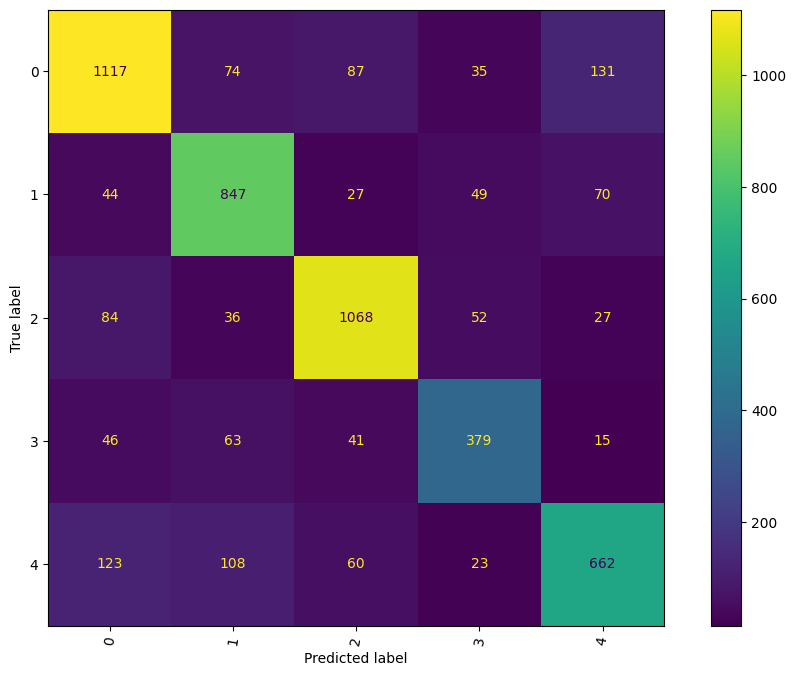

In [83]:
# Decision Tree Classification wuth GridSearchCV

dtc = DecisionTreeClassifier(random_state=40)

dtc_params = {
    'max_depth': [5,10,20,30],
    'min_samples_leaf': [5,10,20,30]
}

# create gridsearch object
grid_search_dtc = grid_search(dtc, folds, dtc_params, scoring='roc_auc_ovr')

# fit model
grid_search_dtc.fit(X_train, y_train)

# print best hyperparameters
print_best_score_params(grid_search_dtc)

# Random Forest Classification Report
metric7=[]
display_classification_report(grid_search_dtc,metric7)

<p style="background-color: #FF0068; font-family: Franklin Gothic Medium; color: #FFF9ED; font-size: 150%; text-align: center; border-radius: 10px;">
  <a id="random_forest_classifier_gridsearchcv" style="color: white; text-decoration: none;">Random Forest Classifier with GridSearchCV</a>
</p>


## **Random Forest Classifier with GridSearchCV**

Fitting 5 folds for each of 80 candidates, totalling 400 fits
OOB SCORE : 0.8048595292331056
Best Score:  0.9715557838378521
Best Hyperparameters:  {'max_depth': 40, 'min_samples_leaf': 5, 'n_estimators': 700}
ROC AUC Score Train: 0.99
ROC AUC Score Test: 0.97
Train Accuracy : 0.91
Test Accuracy : 0.81
Classification Report for Train:
               precision    recall  f1-score   support

           0       0.86      0.98      0.92      4332
           1       0.94      0.91      0.93      3110
           2       0.91      0.96      0.94      3802
           3       0.96      0.76      0.85      1632
           4       0.96      0.85      0.90      2928

    accuracy                           0.91     15804
   macro avg       0.93      0.89      0.91     15804
weighted avg       0.92      0.91      0.91     15804

Classification Report for Test:
               precision    recall  f1-score   support

           0       0.74      0.93      0.82      1444
           1       0.83      0.

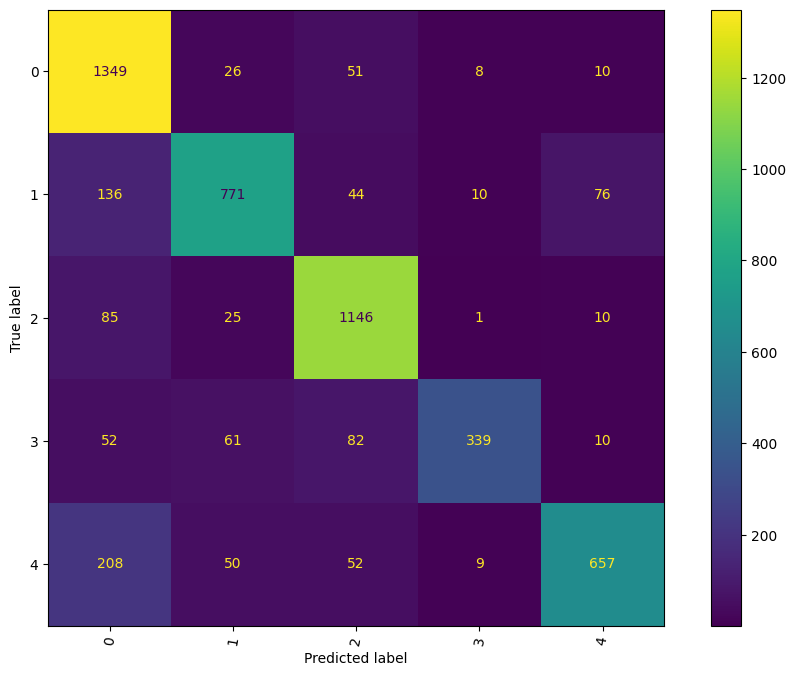

In [84]:
# Random Forest Classifier with GridSearchCV

rfc = RandomForestClassifier(random_state=40, n_jobs = -1,oob_score=True)

# hyperparameters for Random Forest
rfc_params = {'max_depth': [10,20,30,40],
          'min_samples_leaf': [5,10,15,20,30],
          'n_estimators': [100,200,500,700]
        }

# create gridsearch object
grid_search_rfc = grid_search(rfc, folds, rfc_params, scoring='roc_auc_ovr')

# fit model
grid_search_rfc.fit(X_train, y_train)

# oob score
print('OOB SCORE :',grid_search_rfc.best_estimator_.oob_score_)

# print best hyperparameters
print_best_score_params(grid_search_rfc)

# Random Forest Classification Report
metric8=[]
display_classification_report(grid_search_rfc,metric8)

<p style="background-color: #6700c0; font-family: Franklin Gothic Medium; color: #FFF9ED; font-size: 250%; text-align: center; border-radius: 10px;">
  <a id="model_inference" style="color: white; text-decoration: none;">Model inference</a>
</p>


# **Model inference**


#### **Consolidated view of all the models and their metrics**

In [85]:
table = {'Metric': ['ROC_AUC Score(Train)','ROC_AUC Score(Test)',
                    'Accuracy(Train)','Accuracy(Test)',
                    'Precision(Train)','Precision(Test)',
                    'Recall(Train)','Recall(Test)',
                    'F1-Score(Train)','F1-Score(Test)'
                   ], 
        'Multinomial Naive Bayes': metric1
        }

mnb_metric = pd.DataFrame(table ,columns = ['Metric', 'Multinomial Naive Bayes'] )
log_metric = pd.Series(metric2, name = 'Logistic Regression')
dtc_metric = pd.Series(metric3, name = 'Decision Tree Classifier')
rfc_metric = pd.Series(metric4, name = 'Random Forest Classifier')
grid_mnb_metric = pd.Series(metric5, name = 'Multinomial Naive Bayes with GridSearchCV')
grid_log_metric = pd.Series(metric6, name = 'Logistic Regression with GridSearchCV')
grid_dtc_metric = pd.Series(metric7, name = 'Decision Tree Classifier with GridSearchCV')
grid_rfc_metric = pd.Series(metric8, name = 'Random Forest Classifier with GridSearchCV')

final_metric = pd.concat([mnb_metric,log_metric,dtc_metric,rfc_metric,
                         grid_mnb_metric,grid_log_metric,grid_dtc_metric,grid_rfc_metric], axis = 1)

final_metric

,Metric,Multinomial Naive Bayes,Logistic Regression,Decision Tree Classifier,Random Forest Classifier,Multinomial Naive Bayes with GridSearchCV,Logistic Regression with GridSearchCV,Decision Tree Classifier with GridSearchCV,Random Forest Classifier with GridSearchCV
0,ROC_AUC Score(Train),0.95,1.00,1.00,1.00,0.98,1.00,0.97,0.99
1,ROC_AUC Score(Test),0.93,0.99,0.85,0.98,0.95,0.99,0.94,0.97
2,Accuracy(Train),0.68,0.95,1.00,1.00,0.85,0.94,0.81,0.91
3,Accuracy(Test),0.64,0.90,0.76,0.83,0.76,0.93,0.77,0.81
4,Precision(Train),0.76,0.95,1.00,1.00,0.85,0.94,0.81,0.92
5,Precision(Test),0.72,0.90,0.76,0.84,0.76,0.93,0.77,0.82
6,Recall(Train),0.68,0.95,1.00,1.00,0.85,0.94,0.81,0.91
7,Recall(Test),0.64,0.90,0.76,0.83,0.76,0.93,0.77,0.81
8,F1-Score(Train),0.66,0.95,1.00,1.00,0.85,0.94,0.81,0.91
9,F1-Score(Test),0.61,0.90,0.76,0.83,0.75,0.93,0.77,0.81


### **Complaint Prediction using the best model above**

#### **The best model looks to be Logistic Regression with GridSearchCV**

In [86]:
# raw complaint text
test_complaint= 'I tried to make a transaction at a supermarket retail store, using my chase \
debit/atm card, but the transaction was declined. I am still able to withdraw money out of an \
ATM machine using the same debit card. Please resolve this issue.'

In [87]:
# clean the raw text
# test_complaint = clean_text(test_complaint)
# test_complaint = lemmatizer(test_complaint)
# test_complaint = extract_pos_tags(test_complaint)
# test_complaint

In [88]:
# vectorize and tf-idf tranform
test = count_vect.transform([test_complaint])
test_tfidf = tfidf_transformer.transform(test)

In [89]:
# predict
prediction=grid_search_log.predict(test_tfidf)
prediction

array([1])

In [90]:
topic_mapping[prediction[0]]

'Credit card or prepaid card'